In [1]:
%matplotlib inline
from skimage import color, io , transform
from scipy.misc import imresize
import numpy as np
from sklearn.cross_validation import train_test_split
import os
from glob import glob
from skimage.transform import resize , rescale
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA

files_path = 'train/'
pca = PCA(n_components=1600)
cat_files_path = os.path.join(files_path, 'cat*.jpg')
dog_files_path = os.path.join(files_path, 'dog*.jpg')
cat_files = sorted(glob(cat_files_path))
dog_files = sorted(glob(dog_files_path))

n_files = len(cat_files) + len(dog_files)
#n_files = 5000


size_image =64
#size_image2 = 64

allX = np.zeros((2*n_files, size_image, size_image), dtype='float64')
ally = np.zeros(2*n_files)
count = 0
for f in cat_files:
    try:
        img = io.imread(f)
        new_img = color.rgb2gray(img)
        new_img = resize(new_img,(size_image,size_image))
        #x = pca.fit_transform(np.array(new_img).reshape(4096,))
        allX[count] = np.array(new_img) #x.reshape(30,30)
        ally[count] = 0
        count += 1
        rot = transform.rotate(new_img,20)
        allX[count]= np.array(rot)
        ally[count] = 0
        count+=1
    except:
        continue

for f in dog_files:
    try:
        img = io.imread(f)
        new_img = color.rgb2gray(img)
        new_img = resize(new_img,(size_image,size_image))
        #x = pca.fit_transform(np.array(new_img).reshape(4096,))
        allX[count] = np.array(new_img)#x.reshape(30,30)
        ally[count] = 1
        count += 1
        
        rot = transform.rotate(new_img,20)
        allX[count]= np.array(rot)
        ally[count] = 1
        #count+=1
    except:
        continue
   

X, X_test, Y, Y_test = train_test_split(allX, ally, test_size=0.33, random_state=42)
# test-train split   

print(X.shape)

/home/vimal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/vimal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/vimal/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(33498, 64, 64)


In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten , Dropout

# Start construction of the Keras Sequential model.
model = Sequential() 

# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
model.add(InputLayer(input_shape=((size_image,size_image))))

# The input is a flattened array with 784 elements,
# but the convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape((size_image,size_image,1)))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same', activation='relu', name='layer_conv1'))

#model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same', activation='relu', name='layer_conv2'))

#model.add(MaxPooling2D(pool_size=2, strides=2))


# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',activation='relu', name='layer_conv2'))
#model.add(MaxPooling2D(pool_size=2, strides=2))

#model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',activation='relu', name='layer_conv3'))



#model.add(Conv2D(kernel_size=3, strides=1, filters=128, padding='same',activation='relu', name='layer_conv4'))
model.add(MaxPooling2D(pool_size=2, strides=2))

##model.add(Conv2D(kernel_size=3, strides=1, filters=256, padding='same', activation='relu', name='layer_conv5'))
          

#model.add(Conv2D(kernel_size=3, strides=1, filters=256, padding='same', activation='relu', name='layer_conv6'))

#model.add(Conv2D(kernel_size=3, strides=1, filters=256, padding='same', activation='relu', name='layer_conv7'))
          
#model.add(MaxPooling2D(pool_size=2, strides=2))
#model.add(Conv2D(kernel_size=3, strides=1, filters=512, padding='same', activation='relu', name='layer_conv8'))

##model.add(MaxPooling2D(pool_size=2, strides=2))

#model.add(Conv2D(kernel_size=3, strides=1, filters=512, padding='same', activation='relu', name='layer_conv9'))

#model.add(Conv2D(kernel_size=3, strides=1, filters=512, padding='same', activation='relu', name='layer_conv10'))

#model.add(Conv2D(kernel_size=3, strides=1, filters=512, padding='same', activation='relu', name='layer_conv13'))
          
#model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# First fully-connected / dense layer with ReLU-activation.
#model.add(Dense(1024, activation='relu'))

#model.add(Dropout(0.5))

#model.add(Dense(1024, activation='relu'))

#model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(2, activation='softmax'))

In [3]:
from tensorflow.python.keras.optimizers import Adam,Adamax,SGD

from tensorflow.python.keras.utils import to_categorical
Y = to_categorical(Y, 2)
Y_test = to_categorical(Y_test, 2)

optimizer = Adamax(lr=1e-3)

In [4]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#config = tf.ConfigProto(allow_soft_placement=True)
#config.gpu_options.allocator_type = 'BFC'
#config.gpu_options.per_process_gpu_memory_fraction = 0.40


In [10]:
model.fit(x=X,
          y=Y,
          epochs=10, batch_size=32)



Epoch 1/10
33498/33498 [==============================] - 439s 13ms/step - loss: 0.2484 - acc: 0.8820
Epoch 2/10
33498/33498 [==============================] - 494s 15ms/step - loss: 0.2112 - acc: 0.9034
Epoch 3/10
33498/33498 [==============================] - 498s 15ms/step - loss: 0.1700 - acc: 0.9261
Epoch 4/10
33498/33498 [==============================] - 502s 15ms/step - loss: 0.1179 - acc: 0.9503
Epoch 5/10
33498/33498 [==============================] - 504s 15ms/step - loss: 0.0688 - acc: 0.9752
Epoch 6/10
33498/33498 [==============================] - 500s 15ms/step - loss: 0.0318 - acc: 0.9907
Epoch 7/10
33498/33498 [==============================] - 504s 15ms/step - loss: 0.0134 - acc: 0.9978
Epoch 8/10
33498/33498 [==============================] - 507s 15ms/step - loss: 0.0066 - acc: 0.9992
Epoch 9/10
33498/33498 [==============================] - 501s 15ms/step - loss: 0.0038 - acc: 0.9995
Epoch 10/10
33498/33498 [==============================] - 503s 15ms/step - loss: 

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 64, 64, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 64, 64, 32)        320       
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               33554944  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total para

In [7]:
result = model.evaluate(x=X_test,
                        y=Y_test)

16500/16500 [==============================] - 26s 2ms/step


In [8]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.27954047319383335
acc 0.8594545454834447


[9.999958e-01 4.118149e-06]
0.9999958 4.1181489999999995e-06
Cat


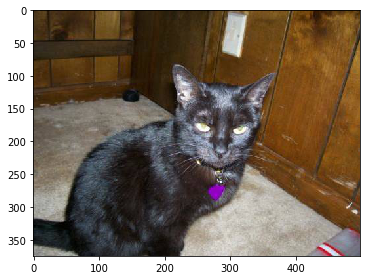

In [95]:
import warnings
warnings.filterwarnings('ignore')
img = io.imread('test/320.jpg')
io.imshow(img)
new_img = color.rgb2gray(img)
new_img = np.array(resize(new_img,(size_image,size_image)))
l = np.zeros((1,size_image,size_image),dtype='float')
l[0] = new_img
ans = str(model.predict(l)[0]).split()
if 'e' in ans[0][1:]:
    a =ans[0][1:].split('e')
    a1 = float(a[0])*10**int(a[1])
else:
    a1=float(ans[0][1:])
if 'e' in ans[1][:-1]:
    b = ans[1][:-1].split('e')
    b1 = float(b[0])*10**int(b[1])
else:
    b1=float(ans[1][:-1])
print(model.predict(l)[0])
print(a1,b1)
if a1>b1:
    print('Cat')
else:
    print('Dog')